# Importing Libraries and Reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Linear Regression - sheet1.csv")

In [3]:
data.describe()

,X,Y
count,300.000000,300.000000
mean,150.500000,103.548889
std,86.746758,57.819733
min,1.000000,3.888889
25%,75.750000,53.722222
50%,150.500000,103.555556
75%,225.250000,153.388889
max,300.000000,201.888889


In [4]:
data.tail()

,X,Y
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,201.888889
299,300,201.888889


In [5]:
data.shape

(300, 2)

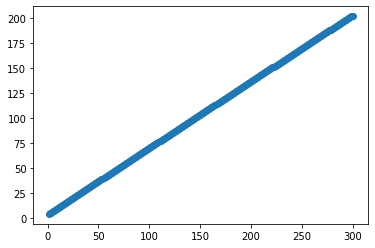

In [6]:
plt.scatter(data['X'],data['Y'])

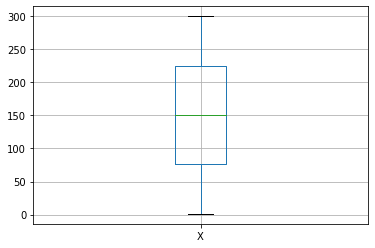

In [7]:
data.boxplot('X')

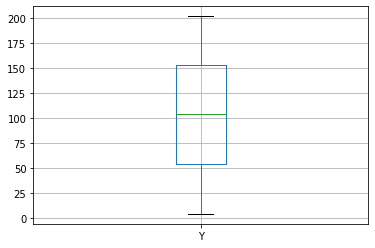

In [8]:
data.boxplot('Y')

In [9]:
x_data = data.drop('Y',axis=1)

In [10]:
x_data = np.array(x_data)

In [11]:
ones = np.ones([x_data.shape[0], 1])

In [12]:
x_data = x_data.reshape(-1,1)

In [13]:
X = np.concatenate([ones, x_data],1)

In [14]:
X.shape

(300, 2)

In [15]:
y_data = data.drop('X',axis =1)

In [16]:
y_data = np.array(y_data)

In [17]:
Y = y_data.reshape(-1,1)

In [18]:
Y.shape

(300, 1)

In [33]:
# notice small alpha value
alpha = 0.00001
iters = 50000
x_mean = np.mean(x_data)
y_mean = np.mean(Y)
theta = np.array([[1.0, 1.0]])
theta.shape

(1, 2)

In [34]:
'''
numerator = 0
denominator = 0
for i in range(len(X)):
    numerator += (x_data[i] - x_mean) * (Y[i] - y_mean)
    denominator += (x_data[i] - x_mean) ** 2hh'h'h

theta1 = numerator/denominator
theta0 = y_mean - (theta1 * x_mean)
theta = np.array([theta0,theta1])
theta.shape

'''

"\nnumerator = 0\ndenominator = 0\nfor i in range(len(X)):\n    numerator += (x_data[i] - x_mean) * (Y[i] - y_mean)\n    denominator += (x_data[i] - x_mean) ** 2hh'h'h\n\ntheta1 = numerator/denominator\ntheta0 = y_mean - (theta1 * x_mean)\ntheta = np.array([theta0,theta1])\ntheta.shape\n\n"

In [35]:
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [36]:
computeCost(X, Y,theta)

1566.651727971186

In [37]:
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum((X @ theta.T - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [38]:
g, cost = gradientDescent(X, Y, theta, alpha, iters)  
print(g, cost)

[[1.26002162 0.67639517]] 0.4890002779756274


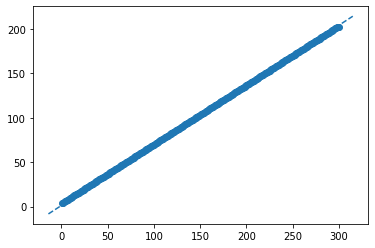

In [39]:
plt.scatter(data['X'],data['Y'])
axes = plt.gca()
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation
plt.plot(x_vals, y_vals, '--')